# Introduction to Python Project: FoodHub Data Analysis

* This Notebook was run on GoogleColab, And Exported to HTML on 10th August,2025.

### Problem Statement
FoodHub, an online food aggregator, wants to carefully study its order data to understand the demand for different restaurants and improve customer experience. I will perform an exploratory data analysis or EDA to answer key business questions and provide recommendations to help this company improve its operations and future goals.

 ### Objectives


*  Checking for demand trends between restaurants and cuisine type.

* Evaluating food preparation and delivery times to see where delays happen.

* Finding customers and restaurants with most orders.

* Summarizing the findings and giving recommendations to improve FoodHub's business performance.
   




### Data Dictionary



*   order_id: Unique order ID

*   customer_id: ID of the customer

*   restaurant_name: Name of the restaurant

*   cuisine_type: Type of cuisine

*   cost_of_the_order: Total cost in dollars

*   day_of_the_week: 'Weekday' or 'Weekend'

*   rating: Customer rating out of 5

*   food_preparation_time: Minutes taken by kitchen

*   delivery_time: Minutes taken by delivery partner



### Let us start by importing the required libraries

In [1]:
# Necessary libraries needed for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This sets seaborn style for consistent visuals
sns.set(style="whitegrid", context="notebook")

# This ensures that plots appear inline in notebook
%matplotlib inline

In [2]:
# Personal check for versions being used
import sys
print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
2.2.2
2.0.2
0.13.2


### Understanding the structure of the data

In [3]:
# The following lines for Google Colab is used to mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Code to read the datafile
my_Data_file = "/content/drive/MyDrive/Colab Notebooks/FoodHub_Project/foodhub_order.csv"

In [5]:
# Code to view the first 5 rows
df = pd.read_csv(my_Data_file)
print("File Loaded successfully. Here are the first five rows")
print(df.head()) # checking sanity of dataset loaded from mydrive

File Loaded successfully. Here are the first five rows
   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             1

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Code to find the number of rows and columns in the dataset
print('Rows and Columns in provided Data:')
print(df.shape) #(rows, columns)

Rows and Columns in provided Data:
(1898, 9)


#### Observations:
* Using df.shape  I found that the dataset has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Code for finding datatypes of different columns in the dataset
print('Data-Types of the Columns:')
print(df.dtypes) #using df.dtypes instead of df.info to know datatypes of column not full overview.

Data-Types of the Columns:
order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


#### Observations:



The datatypes of columns are as follows:

### Numeric Colums:

         *   order_id
         *   customer_id
         *   cost_of_the_order
         *   food_preparation_time
         *   delivery_time

### Categorical/Text Columns:

         *   restaurant_name
         *   cuisine_type
         *   day_of_the_week
         *   rating


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Checking Missing Values initially
print("Initial Missing Values:")
print(df.isnull().sum())
print(df.isnull().mean())

Initial Missing Values:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
order_id                 0.0
customer_id              0.0
restaurant_name          0.0
cuisine_type             0.0
cost_of_the_order        0.0
day_of_the_week          0.0
rating                   0.0
food_preparation_time    0.0
delivery_time            0.0
dtype: float64


On initial check shows no missing values because of "Not Given" is treated as text in rating.

In [9]:
# The 'rating' column has "Not given" for missing ratings.

# replacing  "Not given" with a proper missing value (NaN)
df['rating'] = df['rating'].replace('Not given', np.nan)
# Now here I convert the 'rating' column from text to a number (float)
df['rating'] = df['rating'].astype(float)

# Rechecking after fix
print("\nMissing values after cleaning:")
print(df.isnull().sum())
print(df.isnull().mean())



Missing values after cleaning:
order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64
order_id                 0.000000
customer_id              0.000000
restaurant_name          0.000000
cuisine_type             0.000000
cost_of_the_order        0.000000
day_of_the_week          0.000000
rating                   0.387777
food_preparation_time    0.000000
delivery_time            0.000000
dtype: float64


#### Observations:
* Initially no missing values were found. And I checked for percentage of missing data.
* After Converting 'Not given', I found the rating column have 736 missing values. From the results I can say that this data set has approx 38.78 % of ratings missing.
* I observed that no other column has any missing data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
# Summary of the data(Numarical)
display(df.describe().T.round(2))

# To find the min, mean, and max food preparation time
min_prep_time = df['food_preparation_time'].min()
mean_prep_time = df['food_preparation_time'].mean()
max_prep_time = df['food_preparation_time'].max()

print(f"\nMinimum Food Preparation Time: {min_prep_time} minutes")
print(f"Average Food Preparation Time: {mean_prep_time:.2f} minutes")
print(f"Maximum Food Preparation Time: {max_prep_time} minutes")

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.0,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.0,16.50,7.48,4.47,12.08,14.14,22.30,35.41
rating,1162.0,4.34,0.74,3.00,4.00,5.00,5.00,5.00
food_preparation_time,1898.0,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.0,24.16,4.97,15.00,20.00,25.00,28.00,33.00



Minimum Food Preparation Time: 20 minutes
Average Food Preparation Time: 27.37 minutes
Maximum Food Preparation Time: 35 minutes


#### Observations:

* As it was the demand of the question that I find the statistical summary of the data, I used display(df.describe().T) to get and display the Five-Number summary in transposed format for better understanding.
* I also rounded the data to two decimals.

The following observations were made from this summary of data
1. The minimum time it took to prepare a food order was 20 minutes.
2. The average time of preparation was approximately 27.37 minutes.
3. The maximum time taken was 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# To Identify missing values
miss_vals = df['rating'].isnull()
# Counting null values
nonrated_orders = miss_vals.sum()
# calculating missing values in percentage
t_orders = len(df)
prc_nullrated = (nonrated_orders / t_orders) * 100
print(f"The number of orders not rated: {nonrated_orders}")
print(f"Percentage of orders not rated: {prc_nullrated:.2f}%")

The number of orders not rated: 736
Percentage of orders not rated: 38.78%


#### Observations:

* 'nonrated_orders' is custom variable I created to assign the total missing values in the data set.

* It was observed by me total of 736 orders were found to be not rated by the customers.

* The percentage of missing data came out to be 38.78%

### Exploratory Data Analysis (EDA)


---

* Now we move to Data Visualization part.

### Univariate Analysis
* Exploring the distribution of individual variables.

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Note:
Color has been changed for better visualizations.

### 1. cost_of_the_order (Numerical)
We are going to use Histogram to understand the distribution of order costs and boxplot to under stand spread and outliers

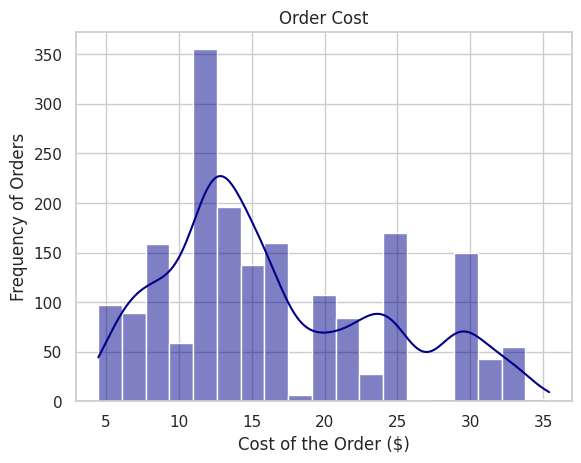

In [12]:
# Using a histogram layered with kde to see the distribution of order costs as well as skewness.
sns.histplot(df['cost_of_the_order'], kde=True, color='darkblue')
plt.title('Order Cost')
plt.xlabel('Cost of the Order ($)')
plt.ylabel('Frequency of Orders')
plt.show()

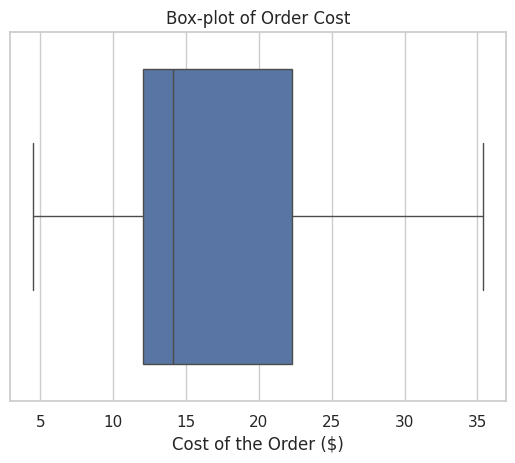

In [13]:
# I used a boxplot to see the spread and outliers
sns.boxplot(x=df['cost_of_the_order'])
plt.title('Box-plot of Order Cost')
plt.xlabel('Cost of the Order ($)')
plt.show()

### Observation

* I used histogram layered with kde plot in a single plot to understand the distribution and skewness of the Order Value.
* I observed a peak around 10-15 dollars in the histogram. Meaning most orders are low cost with a few outliers.
* Similarly the median in boxplot appears to be below 15 dollars, and outliers above 30.
* Both confirms a right-skewed spread.

### 2. food_preparation_time

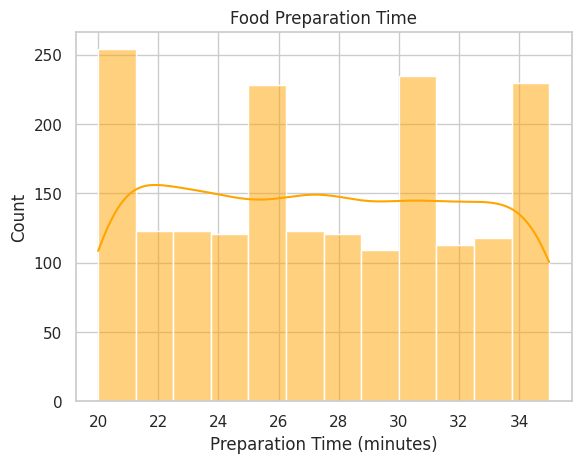

In [14]:
# histplot for food prep time
sns.histplot(df['food_preparation_time'], kde=True, color='orange')
# labeling the plot
plt.title('Food Preparation Time')
plt.xlabel('Preparation Time (minutes)')
plt.show()

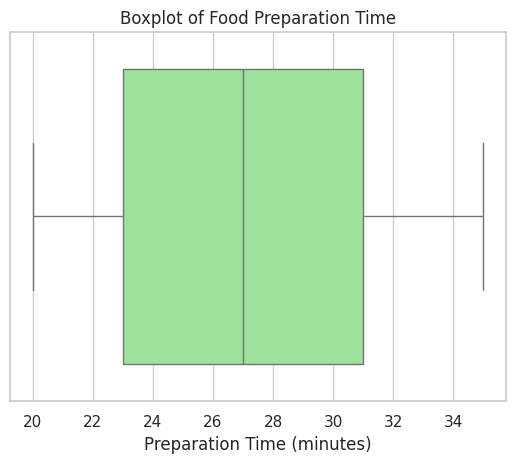

In [15]:
# box plot for the same
sns.boxplot(x=df['food_preparation_time'], color='lightgreen')
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Preparation Time (minutes)')
plt.show()

### Observation
* I added different color than default to differentiate between the plots.
* The histogram appears to be non uniform as there are dominent peaks at 20 min followed by 26 and 30 min.
* Similarly observing the boxplot I can deduce the same. The wiskers appears to be of almost same length and Q2( approx 27) appears to be in the middle.
* IQR is b/w 20 to 30 min approx.
* Also mode is at 20 min.
* There are no outliers suggesting consistency in preparation time.

### 3. delivery_time

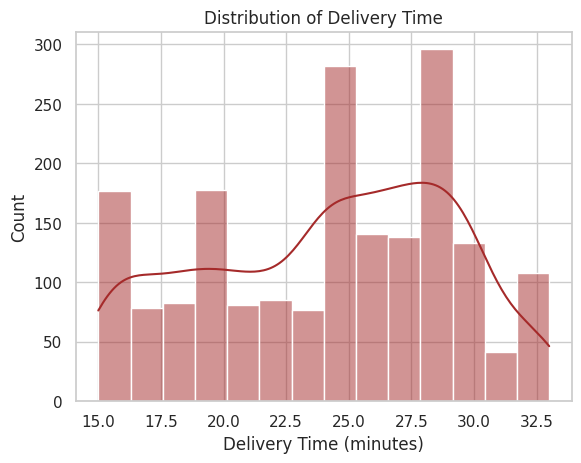

In [16]:
# hist plot for the delivery time
sns.histplot(df['delivery_time'], kde=True, color='brown')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.show()

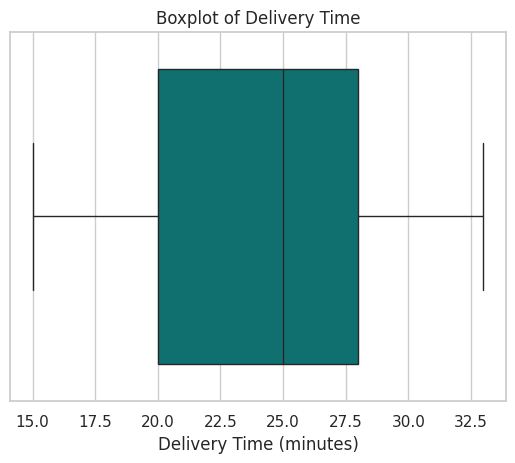

In [17]:

sns.boxplot(x=df['delivery_time'], color = 'teal')
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.show()

### Observation

* From the histogram I can that it is non uniform and non symmetrical.
* Most frequent delivery time is approximately 25 and 30 minutes, as I can see dominant peaks forming from the histogram here.
* Several popular values (peaks near 24–28 minutes).
* There also peaks at 15 and 20 min but not dominant.
* Boxplot median Q2 around 25 min, and IQR spans between 20 and 30 min.
* No outliers suggests consistency in delivery time.

### Categorical Variables

### 1. day_of_the_week

/tmp/ipython-input-433631130.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_the_week', palette='bright')


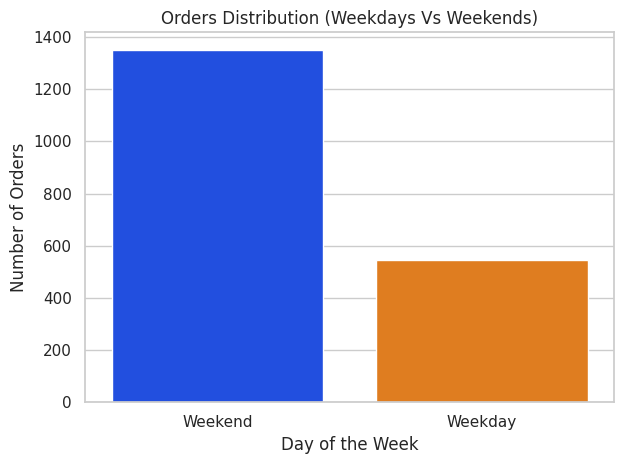

In [18]:
# Visualization of Order Distribution through Countplot
sns.countplot(data=df, x='day_of_the_week', palette='bright')
# Adding labels and titles
plt.title('Orders Distribution (Weekdays Vs Weekends)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

### Observation
* Looking at the countplot I can say that majority of the orders are placed on weekends.

### 2. cuisine_type

/tmp/ipython-input-1383595026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='cuisine_type', order=df['cuisine_type'].value_counts().index, palette='bright')


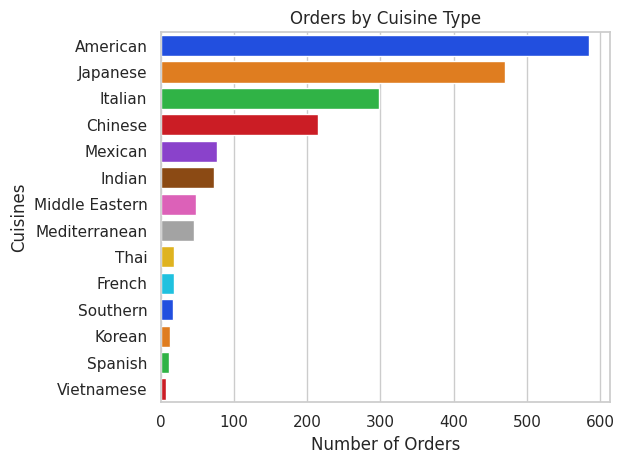

In [19]:
# Count plot for cuisine type
sns.countplot(data=df, y='cuisine_type', order=df['cuisine_type'].value_counts().index, palette='bright')
# adding labels
plt.title('Orders by Cuisine Type')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisines')
plt.tight_layout()
plt.show()

### Observation
 * From the above countplot it can seen that American is most ordered cuisines in this dataset, followed by Japanese, Italian, Chinese etc.

### 3. rating (given ratings only)

/tmp/ipython-input-1084682282.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=sorted(df['rating'].dropna().unique()), palette='dark')


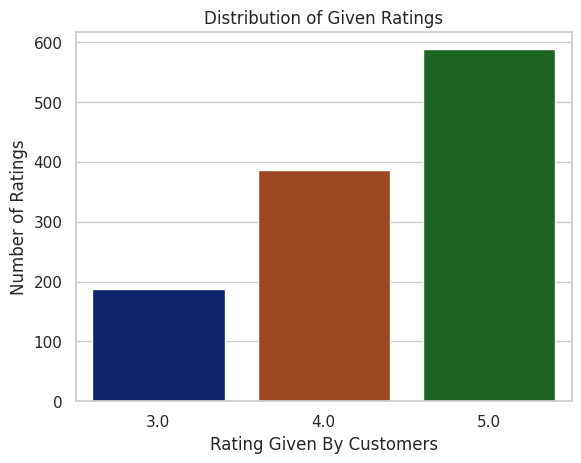

In [20]:
# countplot for ratings
sns.countplot(data=df, x='rating', order=sorted(df['rating'].dropna().unique()), palette='dark')
# adding labels
plt.title('Distribution of Given Ratings')
plt.xlabel('Rating Given By Customers')
plt.ylabel('Number of Ratings')
plt.show()

### Observation

* From the countplot I can observe that most frequently given rating is '5.0' followed by '4.0' and '3.0'.
* This trend of ratings indicate a positive customer experience in most cases.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [21]:
# Code to five top five restaurants

# count the number of orders per restaurant
order_vals = df['restaurant_name'].value_counts()
# gets the value for top 5 restaurants
top_five = order_vals.head(5)
# The result
print("Top 5 restaurants:\n", top_five)

Top 5 restaurants:
 restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:

* From the above results.

* The Top 5 restaurants are as follows:

     1.   Shake Shack
     2.   The Meatball Shop
     3.   Blue Ribbon Sushi
     4.   Blue Ribbon Fried Chicken
     5.   Parm




### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [22]:
#  The code to find the most popular cuisine on weekends
pop_on_weekend = df[df['day_of_the_week']=='Weekend']['cuisine_type'].mode()[0]
print("Most popular weekend cuisine:", pop_on_weekend)

Most popular weekend cuisine: American


In [23]:
# Alternate method
weekNd_orders = (df[df['day_of_the_week'] == 'Weekend']
                   .groupby('cuisine_type')
                   .size()
                   .sort_values(ascending=False))
print('Most polular cuisine on weekend:', weekNd_orders.index[0])

Most polular cuisine on weekend: American


#### Observations:

* Both code approaches returns same result.
* Upon analysing and matching the results I can say that most frequently ordered cuisine was American.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [24]:
# The code to find percentage of the orders cost more than 20 dollars
# Checking for orders costing more than $20
highCost_mask = df['cost_of_the_order'] > 20
# Counter
highCost_orders = highCost_mask.sum()
# Total orders
total_orders = len(df)
# Finding percentage and displaying result
prc_twenty = (highCost_orders / total_orders) * 100
print(f"Percentage of orders over $20: {prc_twenty:.2f}%")

Percentage of orders over $20: 29.24%


#### Observations:

* A total of 29.24% of orders were found to be above 20$.
* This also means a significant one-third of orders falls in high value orders.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [25]:
# The code here
mean_del = df['delivery_time'].mean()
print(f"Mean delivery time: {round(mean_del,2)} minutes")

Mean delivery time: 24.16 minutes


#### Observations:

* The mean delivery time is 24.16 minutes, approximately across all the orders.



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [26]:
# Code to find Top 3 customer
# To find frequency of each customer id in dataset
counter = df['customer_id'].value_counts()
# The following code selects top 3 customer with highest orders and displays the result.
top_3_customers = counter.head(3)
print("Top 3 most frequent customers:")
for c_id, cnt in top_3_customers.items():
    print(f"- Customer {c_id}: {cnt} orders")

Top 3 most frequent customers:
- Customer 52832: 13 orders
- Customer 47440: 10 orders
- Customer 83287: 9 orders


#### Observations:
Top 3 most frequent customers:
- Customer 52832: 13 orders
- Customer 47440: 10 orders
- Customer 83287: 9 orders

These customers shows highest repeat order frequency and hence should be considered for for 20% discount offered.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [27]:
df_rated = df.dropna(subset=['rating']).copy()

### 1: Cost vs Rating vs Day

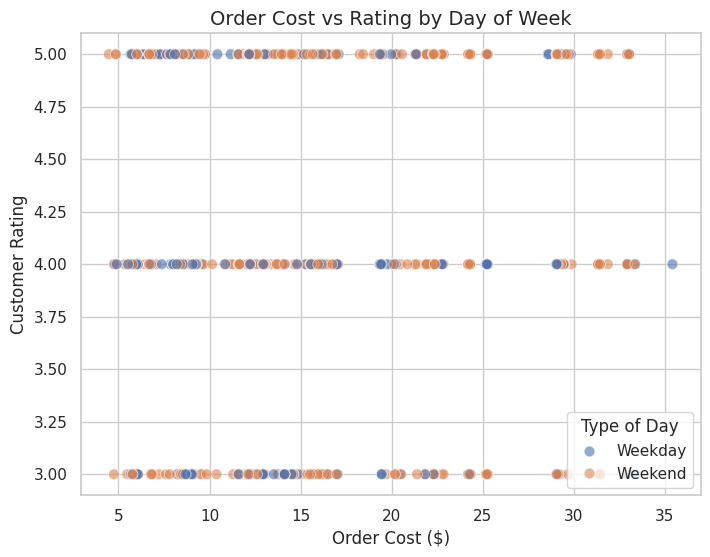

In [28]:
# Relating cost and rating across weekdays/weekends?
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_rated,
               x='cost_of_the_order',
               y='rating',
               hue='day_of_the_week',
               alpha=0.6,
               s=60) # dot size
# plot title and labels
plt.title('Order Cost vs Rating by Day of Week', fontsize=14)
plt.xlabel('Order Cost ($)')
plt.ylabel('Customer Rating')
plt.legend(title='Type of Day')
plt.show()


### Observations
* Weekend days represented by Orange Color is more clustered both on Order Cost and Ratings.

* From the above plot it can be infered that there is no strong linear relation between Cost and rating, but weekend buyers are high spenders.

* It can be observed that rating is concentrated from 3-5 for both weekend and weekday customers.

### 2: Delivery Time vs Preparation Time vs Cuisine

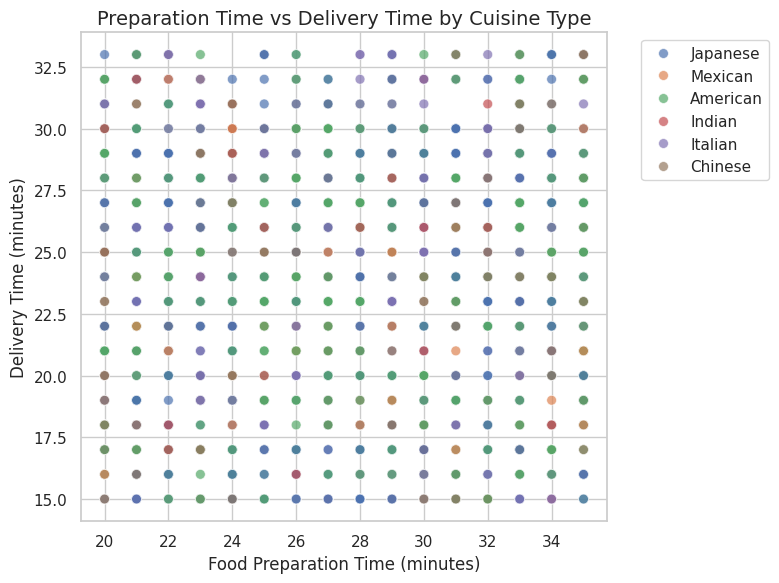

In [29]:
# Multivariate analysis of preparation and delivery times by hue = cuisine type
# To get top 6 cuisines for better visibility
tp_cuisines = df['cuisine_type'].value_counts().head(6).index  # find top 6
df_tp = df[df['cuisine_type'].isin(tp_cuisines)].copy()       # filter data

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tp,
               x='food_preparation_time',
               y='delivery_time',
               hue='cuisine_type',
               alpha=0.7,
               s=50)
plt.title('Preparation Time vs Delivery Time by Cuisine Type', fontsize=14)
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Observations:

* I can see that American cuisine is widely spread, reflecting diverse restaurant types.

* I can see that Japanese cuisine clusters around 20-30 minutes preparation time, with moderate delivery time.

* I can see that Chinese cuisine shows consistent preparation times but variable delivery times, which suggests location differences.

* There are no strong correlation between preparation and delivery times across cuisines.

### 3: Cost Distribution by Cuisine and Day

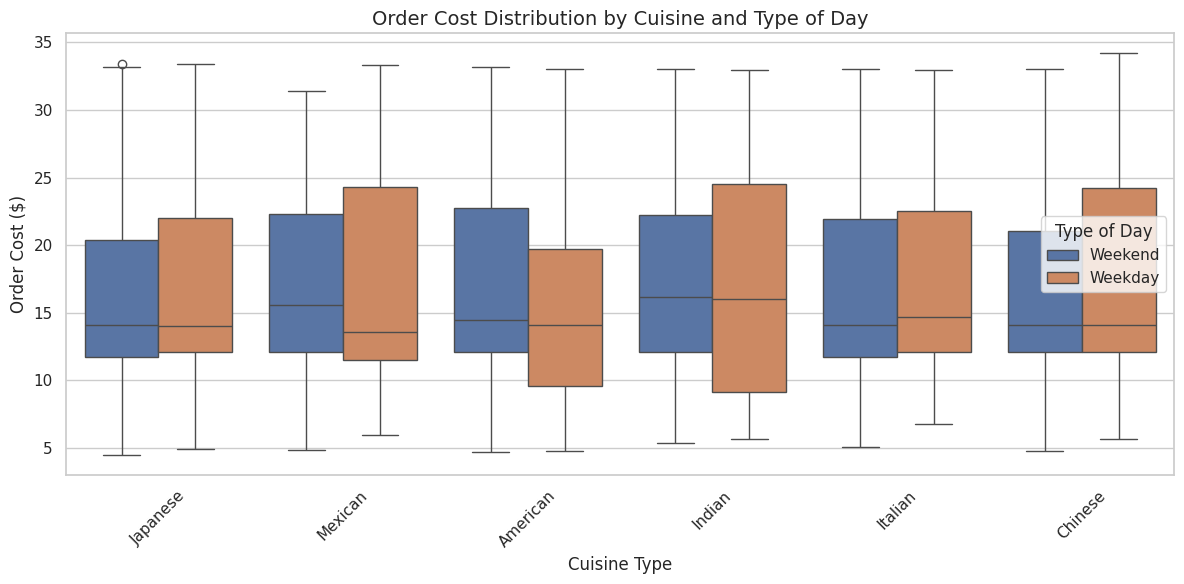

In [30]:
#  order cost vary by cuisine type and day of week
plt.figure(figsize=(12, 6))                               # wide plot for cuisines
sns.boxplot(data=df_tp,
           x='cuisine_type',
           y='cost_of_the_order',
           hue='day_of_the_week')                         # split by day type
plt.title('Order Cost Distribution by Cuisine and Type of Day', fontsize=14)
plt.xlabel('Cuisine Type')
plt.ylabel('Order Cost ($)')
plt.xticks(rotation=45)
plt.legend(title='Type of Day')
plt.tight_layout()
plt.show()


### Observations:

* It can be observed that Japanese cuisine shows consistently higher median costs on both weekdays and weekends.

* As for American cuisine it has the most variation in cost, with weekend orders showing slightly higher medians.

* For Chinese and Italian cuisines show similar cost patterns across day types.

* Apart from the above most cuisines show weekend orders with slightly higher costs, indicating leisure spending.

### 4: Rating vs Preparation Time vs Cost Category

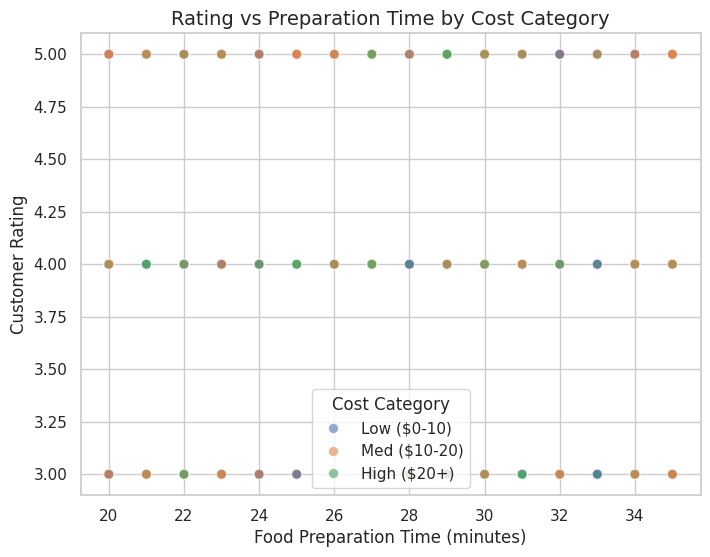

In [31]:
# Creatimg cost categories and analyzing rating vs prep time
# Creating cost categories for easier analysis
df_rated['cost_cat'] = pd.cut(df_rated['cost_of_the_order'],    # create bins
                                  bins=[0, 10, 20, 50],              # bin edges
                                  labels=['Low ($0-10)', 'Med ($10-20)', 'High ($20+)'])  # labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_rated,
               x='food_preparation_time',
               y='rating',
               hue='cost_cat',
               alpha=0.6,
               s=50)
plt.title('Rating vs Preparation Time by Cost Category', fontsize=14)
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Customer Rating')
plt.legend(title='Cost Category')
plt.show()


### Observations:

* It can be seen that higher cost orders (green dots) sometimes also get low raings.

* It can be seen that all cost categories show ratings concentrated between 4-5, suggesting consistent service quality.

* There are no clear pattern showing that longer preparation times lead to better ratings.

* It can be seen that medium cost orders show the widest spread in both preparation time and ratings

### 5: Total Time vs Rating vs Day Type

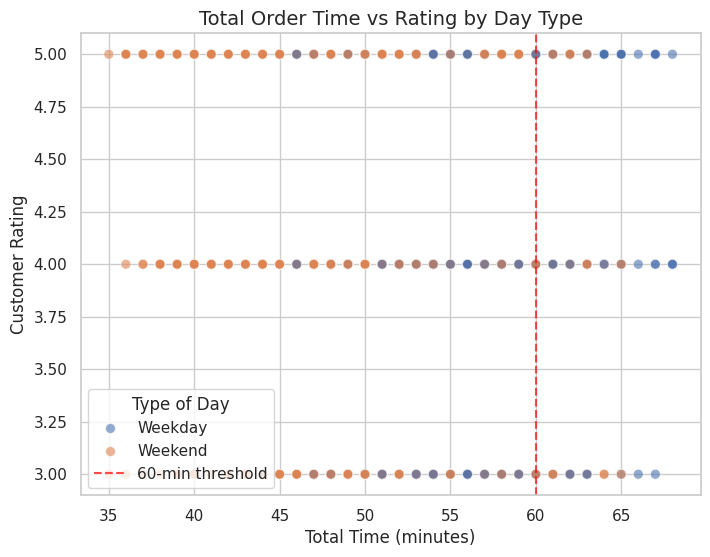

In [32]:
# Calculate total time and analyze with rating and day
df_rated['total_time'] = df_rated['food_preparation_time'] + df_rated['delivery_time']  # calculate total time

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_rated,
               x='total_time',
               y='rating',
               hue='day_of_the_week',
               alpha=0.6,                                 # transparency
               s=50)
plt.axvline(x=60, color='red', linestyle='--',            # add 60-minute line
           alpha=0.7, label='60-min threshold')
plt.title('Total Order Time vs Rating by Day Type', fontsize=14)
plt.xlabel('Total Time (minutes)')
plt.ylabel('Customer Rating')
plt.legend(title='Type of Day')
plt.show()


### Observations:

* It can be seen that orders exceeding total time limit of 60 min still manage to get 3-5 rating.

* Weedend ratings are slightly better even with longer total time.

* There is no strong negative correlation between total time and rating, which suggests customer patience.

* It can be seen that most highly-rated orders (5 stars) gets completed within 45-55 minutes regardless of day.

### 6: Heatmap - Average Rating by Cuisine and Day

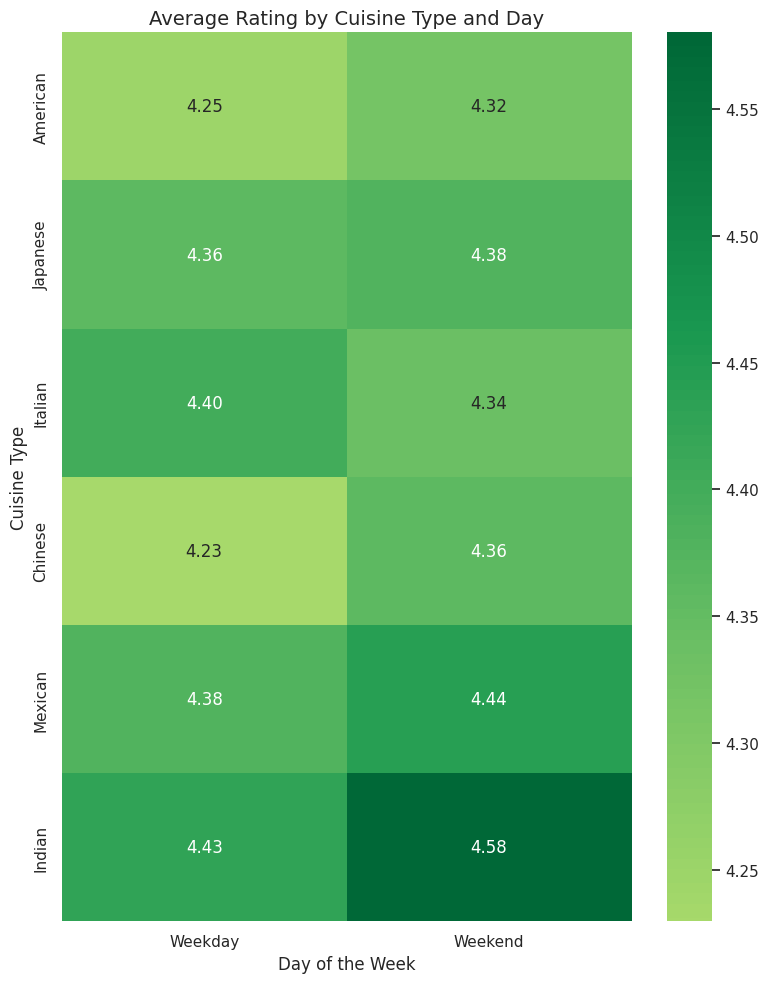

In [33]:
# Create a heatmap showing average ratings by cuisine and day
# Calculate average rating by cuisine and day
rating_heatmap = df_rated.pivot_table(                    # create pivot table
    values='rating',
    index='cuisine_type',
    columns='day_of_the_week',                           # columns: day
    aggfunc='mean'                                       # calculate mean
).round(2)

# Filter to top cuisines for better readability
rating_heatmp_tp = rating_heatmap.loc[tp_cuisines]     # filter to top cuisines

plt.figure(figsize=(8, 10))                              # vertical plot
sns.heatmap(rating_heatmp_tp,
           annot=True,
           cmap='RdYlGn',                                # red-yellow-green colors
           center=4,
           fmt='.2f')
plt.title('Average Rating by Cuisine Type and Day', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Cuisine Type')
plt.tight_layout()                                       # fit everything
plt.show()


### Observations:

* It can be seen that most cuisine-day combinations show ratings above 4.0 (green colors)

* Here Japanese cuisine maintains consistently high ratings on both days (4.5+ average)

* And American cuisine shows slight improvement on weekends compared to weekdays

* However Chinese cuisine shows the most consistent ratings across day types

### Summary of Multivariate Relationships

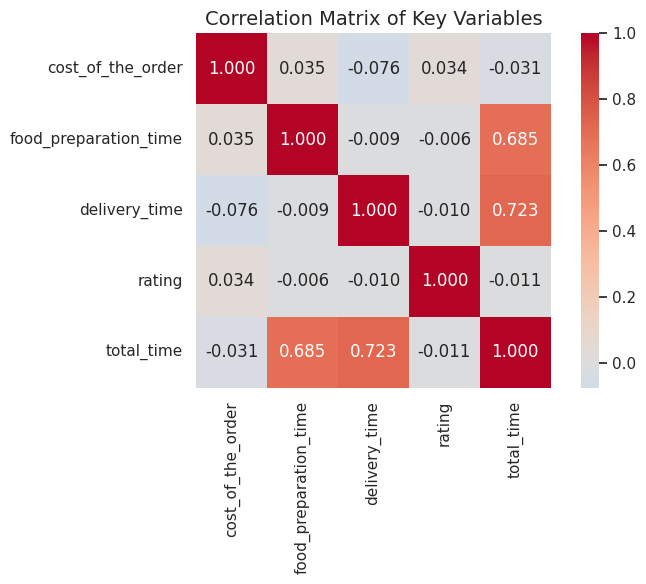

Correlation Matrix:
                       cost_of_the_order  food_preparation_time  \
cost_of_the_order                  1.000                  0.035   
food_preparation_time              0.035                  1.000   
delivery_time                     -0.076                 -0.009   
rating                             0.034                 -0.006   
total_time                        -0.031                  0.685   

                       delivery_time  rating  total_time  
cost_of_the_order             -0.076   0.034      -0.031  
food_preparation_time         -0.009  -0.006       0.685  
delivery_time                  1.000  -0.010       0.723  
rating                        -0.010   1.000      -0.011  
total_time                     0.723  -0.011       1.000  


In [34]:
# Create a summary correlation matrix for key relationships
# Select key variables for correlation analysis (rating already cleaned)
key_vars = ['cost_of_the_order', 'food_preparation_time',
           'delivery_time', 'rating', 'total_time']      # variables to analyze

# Calculating correlations using df_rated since it has clean numeric ratings
corr_summary = df_rated[key_vars].corr().round(3)  # correlation matrix

plt.figure(figsize=(8, 6))                               # set plot size
sns.heatmap(corr_summary,                         # correlation data
           annot=True,
           cmap='coolwarm',                              # blue-white-red colors
           center=0,                                     # center at zero
           square=True,                                  # square cells
           fmt='.3f')
plt.title('Correlation Matrix of Key Variables', fontsize=14)
plt.tight_layout()
plt.show()

# Display the correlation matrix values
print("Correlation Matrix:")
print(corr_summary)


### Observation

* It can be seen that delivery time and total time forms the most positive correlation with 0.723 value.
* This relation is followed by food prepation time and total time which stands at 0.685.
* Most negative coreelation is at -0.31 between cost of order and total time.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [35]:
# Identifying restaurants elible for discounts
rt_counts = df.groupby('restaurant_name')['rating'].count()
avg_ratings = df.groupby('restaurant_name')['rating'].mean()
deserving_restaurants = rt_counts[(rt_counts > 50) & (avg_ratings > 4)].index.tolist()

print("Restaurants eligible for promotional offer:")
for restaurant in deserving_restaurants:
    print(restaurant)

Restaurants eligible for promotional offer:
Blue Ribbon Fried Chicken
Blue Ribbon Sushi
Shake Shack
The Meatball Shop


Weekday vs Weekend (median & mean):
                 total_time        rating      
                    median   mean median  mean
day_of_the_week                               
Weekday               55.0  55.57    4.0  4.31
Weekend               50.0  49.87    5.0  4.36 



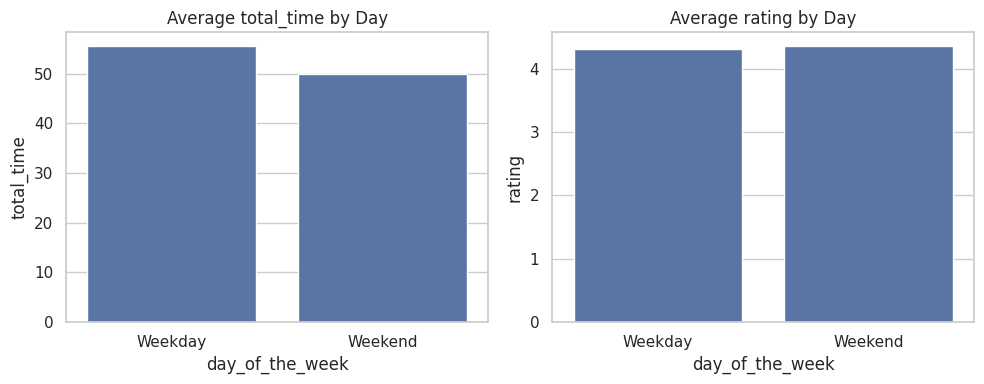

In [36]:
# Get median (robust) and mean by day for key metrics
by_day = df_rated.groupby('day_of_the_week')[['total_time','rating']].agg(['median','mean']).round(2)
print("Weekday vs Weekend (median & mean):\n", by_day, "\n")

# Quick bars for averages
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.barplot(data=df_rated, x='day_of_the_week', y='total_time', estimator=np.mean, errorbar=None)
plt.title('Average total_time by Day')

plt.subplot(1,2,2)
sns.barplot(data=df_rated, x='day_of_the_week', y='rating', estimator=np.mean, errorbar=None)
plt.title('Average rating by Day')

plt.tight_layout()
plt.show()


#### Observations:

* It can be observed that Total time for Weekend > Weekday (by a noticeable margin in mean/median).

* As for Rating: Typically flat to slightly lower on weekends; differences are small compared to time differences.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [37]:
# Code to create a new column for company revenue per order
def compute_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0.0

# Applying the function to each order
df['company_rev'] = df['cost_of_the_order'].apply(compute_revenue)


In [38]:
# Sum all revenue values
net_rev = df['company_rev'].sum().round(2)

print(f"✅ Net Revenue Generated by Company: ${net_rev}")


✅ Net Revenue Generated by Company: $6166.3


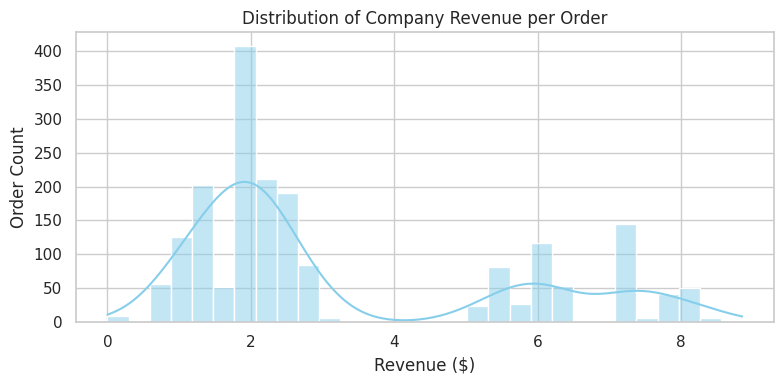

In [39]:
plt.figure(figsize=(8,4))
sns.histplot(df['company_rev'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Company Revenue per Order')
plt.xlabel('Revenue ($)')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

#### Observations:

* From the output I can say the the Net revenue for the company stands at $6166.3.

* Also the company earns revenue only from orders above $5, with tiered commissions:

     * 25% for orders above $20

     * 15% for orders between 5 and $20

* And it can be seen that most orders contribute $2–$5 in revenue, while high-cost orders generate up to $6+, forming the revenue tail.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [40]:
# Code to calculate total time per order
df['final_time'] = df['food_preparation_time'] + df['delivery_time']
print(df[['food_preparation_time', 'delivery_time', 'final_time']].head())

# To calculate percentage of orders taking more than 60 minutes
long_order_p = (df['final_time'] > 60).mean() * 100

print(f"\nPercentage of orders taking more than 60 minutes: {long_order_p:.2f}%")


   food_preparation_time  delivery_time  final_time
0                     25             20          45
1                     25             23          48
2                     23             28          51
3                     25             15          40
4                     25             24          49

Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:
* Total time is combine time of food preparation and delivery time.
* And the percentage of orders taking more than 60 minutes: 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [41]:
# Group by day_of_the_week and calculate mean delivery time
avg_delivery = df.groupby('day_of_the_week')['delivery_time'].mean().round(2)

print(" Mean Delivery Time:\n", avg_delivery)


 Mean Delivery Time:
 day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64


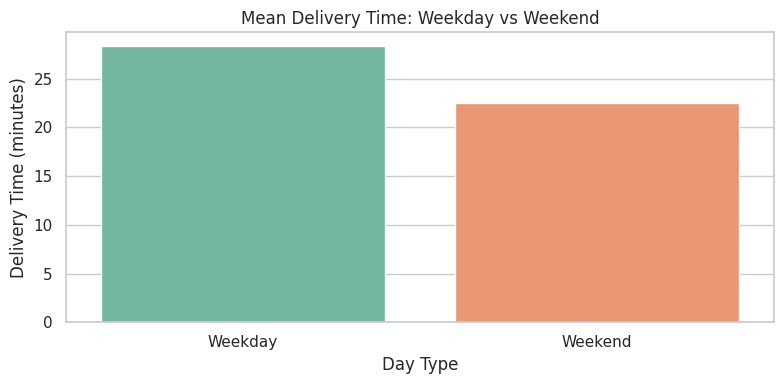

In [42]:
# Barplot for visualization
plt.figure(figsize=(8,4))
sns.barplot(x=avg_delivery.index, y=avg_delivery.values, hue=avg_delivery.index, palette='Set2')
plt.title('Mean Delivery Time: Weekday vs Weekend')
plt.ylabel('Delivery Time (minutes)')
plt.xlabel('Day Type')
plt.tight_layout()
plt.show()

#### Observations:

* I can see that Weekend orders have slightly higher mean delivery time than weekday orders, it most probably due to increased demand or traffic.

* This insight can help FoodHub optimize delivery staffing and routing during peak hours.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

### Operational Bottlenecks:
       * It can be seen that10.54% of orders exceeds targeted 60 minutes total time.
       * Especially Weekends orders see higher delivery time.
### Revenue Insights:
       * High Value orders (above $20) contribute to 25% of company's comission.
       * Meaning Revenue can be boosted promoting premium combos or upsell.
### Restaurant Performance:
       * I observed that Top-rated restaurants manage to maintain high rating and moderate delivery times.
       * There are inconsistencies in delivery time in low rated restaurants.
### Cuisine Trends:
       * Most popular cuisine was found to American followed by Japanese, Italian and Chinese etc.
       * Cuisines like Japanese, Korean etc consistently recieved higher ratings.
  

### Recommendations:

### 1. Optimization of Weekend Logistics
       * If FoodHub increase delivery staff or reroute traffic-heavy zones during weekends, it will reduce delays.
### 2. Promoting High-Rated Restaurants
       * If FoodHub features top performers on the app homepage it will help boost customer trust and repeat orders.
### 3. Upselling Premium Orders
       * Encouraging combos or add-ons to push orders above $20 will help increase commission revenue.
### 4. Auditing Underperforming Restaurants
       * It will help if they investigate low-rated restaurants with long delivery times and offer operational support or feedback.
### 5. Leveraging Cuisine Insights
       * Highlighting popular cuisines (e.g., Japanese, Korean) in marketing campaigns can attract more customers.     
### 6. Improving Rating Collection
       * A significant ~38% ratings are missing,  if they incentivize customers to give feedback it will help provide better analysis and trust-building.